In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#load the dataset into our code
data_set = pd.read_csv("Salary_Data.csv")

In [3]:
data_set.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data_set.count()

YearsExperience    30
Salary             30
dtype: int64

In [5]:
#extract the dependent and independent variables from the given dataset.
#The independent variable is years of experience, and the dependent variable is salary.
#x (independent) variable and y (dependent) variable
x = data_set.iloc[:,0].values.reshape(-1,1)
y = data_set.iloc[:,1].values.reshape(-1,1)

In [6]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
x.shape

(30, 1)

In [8]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [9]:
y.shape

(30, 1)

In [10]:
# Splitting the dataset into training and test set.  

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

#test_size = 1/3 i.e. we have taken 10 out of 30 obsevation as test data.

In [11]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [12]:
x_test.shape

(10, 1)

In [13]:
y_test

array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.],
       [112635.],
       [ 55794.],
       [ 83088.],
       [101302.]])

In [14]:
y_test.shape

(10, 1)

In [15]:
x_train

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [16]:
x_train.shape

(20, 1)

In [17]:
y_train

array([[ 56642.],
       [ 66029.],
       [ 64445.],
       [ 61111.],
       [113812.],
       [ 91738.],
       [ 46205.],
       [121872.],
       [ 60150.],
       [ 39891.],
       [ 81363.],
       [ 93940.],
       [ 57189.],
       [ 54445.],
       [105582.],
       [ 43525.],
       [ 39343.],
       [ 98273.],
       [ 67938.],
       [ 56957.]])

In [18]:
y_train.shape

(20, 1)

In [19]:
print (f"{x_train.shape} ,  {y_train.shape}")
print (f"{x_test.shape} ,  {y_test.shape}")

(20, 1) ,  (20, 1)
(10, 1) ,  (10, 1)


In [20]:
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#Prediction of Test and Training set result   
y_pred= regressor.predict(x_test)
x_pred = regressor.predict(x_train)

In [22]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,37731.0,40835.105909
1,122391.0,123079.399408
2,57081.0,65134.556261
3,63218.0,63265.367772
4,116969.0,115602.645454
5,109431.0,108125.891499
6,112635.0,116537.239698
7,55794.0,64199.962017
8,83088.0,76349.687193
9,101302.0,100649.137545


In [23]:
####################################################################
####################################################################
from sklearn.metrics import mean_squared_error
print(f"Mean Squared Error : {mean_squared_error(y_test,y_pred)}")
print(f"Weights/Slope : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Mean Squared Error : 21026037.329511296
Weights/Slope : [[9345.94244312]]
Intercept : [26816.19224403]


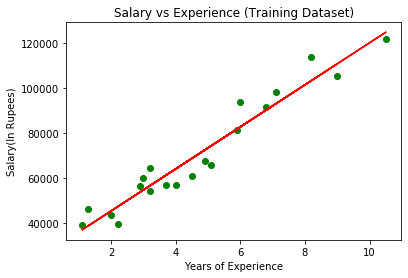

In [24]:
plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()   

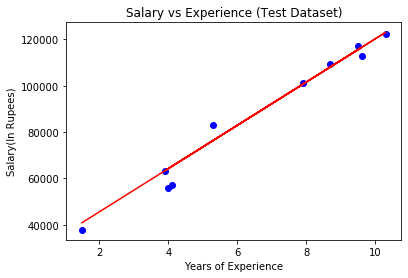

In [25]:
#visualizing the Test set results 
plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_test, y_pred, color="red")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()   

In [38]:
from sklearn.metrics import accuracy_score
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))  


Train Score:  0.9381900012894278
Test Score:  0.9749154407708353
